In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from pyometiff import OMETIFFWriter
import webknossos as wk

In [4]:
# this comes from the WEBKNOSSOS website, under the user settings
AUTH_TOKEN = "xxx"

(-0.5, 253.5, 255.5, -0.5)

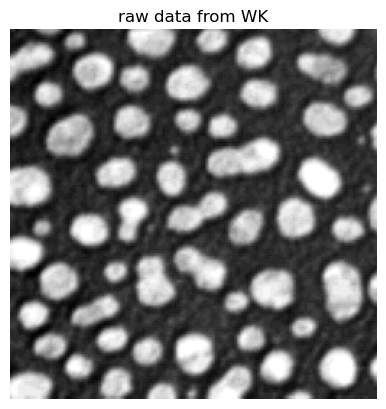

In [ ]:
# the dataset url comes from the WEBKNOSSOS website, open the image of interest from the dashboard and check
# I removed the view information
DATASET_URL = "https://webknossos.org/datasets/d81d5c1e8bacc88a/Blobs"
with wk.webknossos_context(token=AUTH_TOKEN):
    dataset = wk.Dataset.open_remote(DATASET_URL)
    raw_data = dataset.get_color_layer().get_finest_mag().read()


plt.figure()
plt.imshow(raw_data.squeeze(), cmap="gray")
plt.title(f'raw data from WK')
plt.axis('off')

(-0.5, 253.5, 255.5, -0.5)

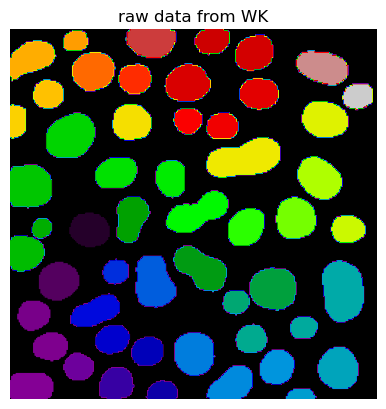

In [18]:
# the annotation id comes from the WEBKNOSSOS website, go to the dashboard and check the IDs
# copy the long version!
ANNOTATION_ID = "65ef15c1010000ea00ffbbe3"
# I was interested in the best res, but downsampling is biuld into the WK structure
MAG = wk.Mag("1-1-1")
with wk.webknossos_context(token=AUTH_TOKEN):
    dataset = wk.Annotation.open_as_remote_dataset(ANNOTATION_ID, webknossos_url="https://webknossos.org")
    mag_view = dataset.get_segmentation_layers()[0].get_mag(MAG)
    seg = mag_view.read()

plt.figure()
plt.imshow(seg.squeeze(), cmap="nipy_spectral")
plt.title(f'raw data from WK')
plt.axis('off')

In [19]:
import pandas as pd
from skimage.measure import label, regionprops_table

   label   area  eccentricity  intensity_mean
0      1  532.0      0.535933      192.045113
1      2  599.0      0.414063      174.383973
2      3  379.0      0.425777      175.936675
3      4  376.0      0.613475      153.510638
4      5  503.0      0.792978      205.773360
           label         area  eccentricity  intensity_mean
count  54.000000    54.000000     54.000000       54.000000
mean   27.500000   496.444444      0.583521      172.268725
std    15.732133   203.778150      0.187705       18.120953
min     1.000000   122.000000      0.158886      122.509804
25%    14.250000   342.750000      0.428893      160.851420
50%    27.500000   506.000000      0.583285      173.521173
75%    40.750000   639.750000      0.734122      185.453413
max    54.000000  1026.000000      0.929144      209.083947


array([[<Axes: title={'center': 'area'}>]], dtype=object)

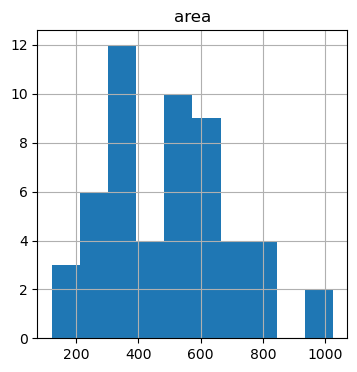

In [20]:
# run connected component analysis
#lbl = label(mask)

properties = ['label', 'area','eccentricity','intensity_mean']
table = regionprops_table(label_image=seg.squeeze(),
                          intensity_image=raw_data.squeeze(),
                          properties=properties)
table = pd.DataFrame(table)
print(table.head())
print(table.describe())
table.hist(column='area', figsize=(4, 4))